# 딥러닝 구조 연습2

## 라이브러리 로드

In [1]:
import pandas as pd
import tensorflow as tf

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 데이터 로드

In [3]:
df = pd.read_csv('./data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 데이터 준비

In [4]:
X_train=df.drop(['Outcome'],axis=1)
y_train=df['Outcome']

In [5]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [6]:
X_train.ndim

2

In [7]:
X_train.shape

(768, 8)

## 딥러닝 구성하기

http://alexlenail.me/NN-SVG/index.html

In [8]:
# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 모델을 만드는 목적: 이진 분류



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 설정하기

In [10]:
# 모델을 컴파일합니다.
# 이진분류 loss: binary_crossentropy
# 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])

## 딥러닝 훈련하기

In [11]:
X_train.shape

(768, 8)

In [16]:
y_train.shape

(768,)

In [12]:
# 모델을 실행합니다.
epoch_hist =  model.fit(X_train,y_train,epochs=200)

Epoch 1/200
24/24 [==============================] - 0s 1ms/step - loss: 6.9539 - Accuracy: 0.5885
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 4.5965 - Accuracy: 0.6185
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 2.8848 - Accuracy: 0.6133
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 1.7209 - Accuracy: 0.5755
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 1.3019 - Accuracy: 0.5378
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 1.0934 - Accuracy: 0.5703
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0266 - Accuracy: 0.5833
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9620 - Accuracy: 0.5990
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9338 - Accuracy: 0.6120
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.8773 - Accuracy: 0.6263
Epoch 11/

## 평가하기

In [14]:
# 결과를 출력합니다.
model.evaluate(X_train,y_train)[1]

24/24 [==============================] - 0s 2ms/step - loss: 0.5570 - Accuracy: 0.7031


0.703125

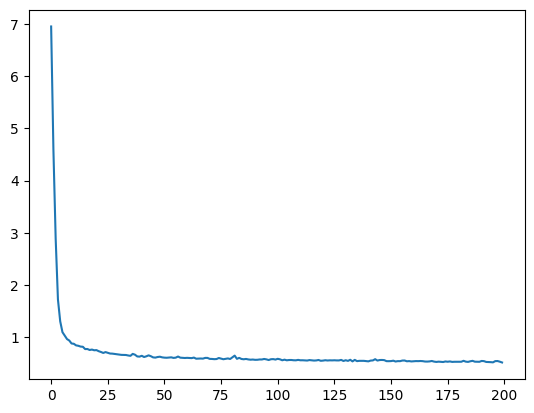

In [15]:
import matplotlib.pyplot as plt
plt.plot(epoch_hist.history['loss'])

## 전체 코드

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df=pd.read_csv('./data/diabetes.csv')
X_train= df.drop(['Outcome'],axis=1)
y_train = df['Outcome']

# type(X_train),type(y_train)

model = Sequential()
model.add(Dense(units=12,input_shape=(8,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])
epoch_hist=model.fit(X_train,y_train,epochs=200)
model.evaluate(X_train,y_train)
# plt.plot(epoch_hist.history['loss'])
# plt.show()

Epoch 1/200
24/24 [==============================] - 0s 780us/step - loss: 4.0284 - Accuracy: 0.5339
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 1.5277 - Accuracy: 0.5534
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 1.0360 - Accuracy: 0.5091
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.9147 - Accuracy: 0.5208
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7972 - Accuracy: 0.5482
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 0.7400 - Accuracy: 0.5729
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7197 - Accuracy: 0.6146
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6733 - Accuracy: 0.6172
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6525 - Accuracy: 0.6432
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6472 - Accuracy: 0.6589
Epoch 1

[0.4690941274166107, 0.7838541865348816]

## 실험

아래의 파라미터를 조정해보며 네트워크의 구성과 성능을 살펴봅시다. 
* Dense층의 유닛개수를 조정해 봅시다. 
* Dense층을 더 넣어 봅시다. 
* epoch수와 batch_size를 조정해 봅시다.